# Boston Housing Dataset - Exploratory Data Analysis and Prediction

- EDA
- Preprocessing
- Linear Regression with GridSearchCV
- Ridge Regression with GridSearchCV
- Lasso Regression with GridSearchCV
- Prediction and Performance Evaluation

# About Dataset
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town


ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lowerstatus of the population

MEDV: Median value of owner-occupied homes in $1000s


We can see that the input attributes have a mixture of units.

# Importing the csv file and reading the data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Loading the dataset

In [11]:
df = pd.read_csv(r"D:\Harsh\ds_eda\BostonHousing.csv")

In [12]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
# Statistical Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Memory Optimization

In [70]:
for col in df.columns:
    df[col] = df[col].astype("float32")

In [173]:
df["chas"] = df['chas'].astype("float32")

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float32
 1   zn       506 non-null    float32
 2   indus    506 non-null    float32
 3   chas     506 non-null    float32
 4   nox      506 non-null    float32
 5   rm       506 non-null    float32
 6   age      506 non-null    float32
 7   dis      506 non-null    float32
 8   rad      506 non-null    float32
 9   tax      506 non-null    float32
 10  ptratio  506 non-null    float32
 11  b        506 non-null    float32
 12  lstat    506 non-null    float32
 13  medv     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


Conclusion:

We have optimised the memory usage by reducing the file size from 55.5 KB to 27.8 KB, reduction of about 50%.
Though the current data size is small, this would have been significant in large dataset.

# Preprocessing

In [175]:
# Checking for Null Values

In [176]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# Exploratory Data Analysis

In [177]:
# 1. Checking for Outliers

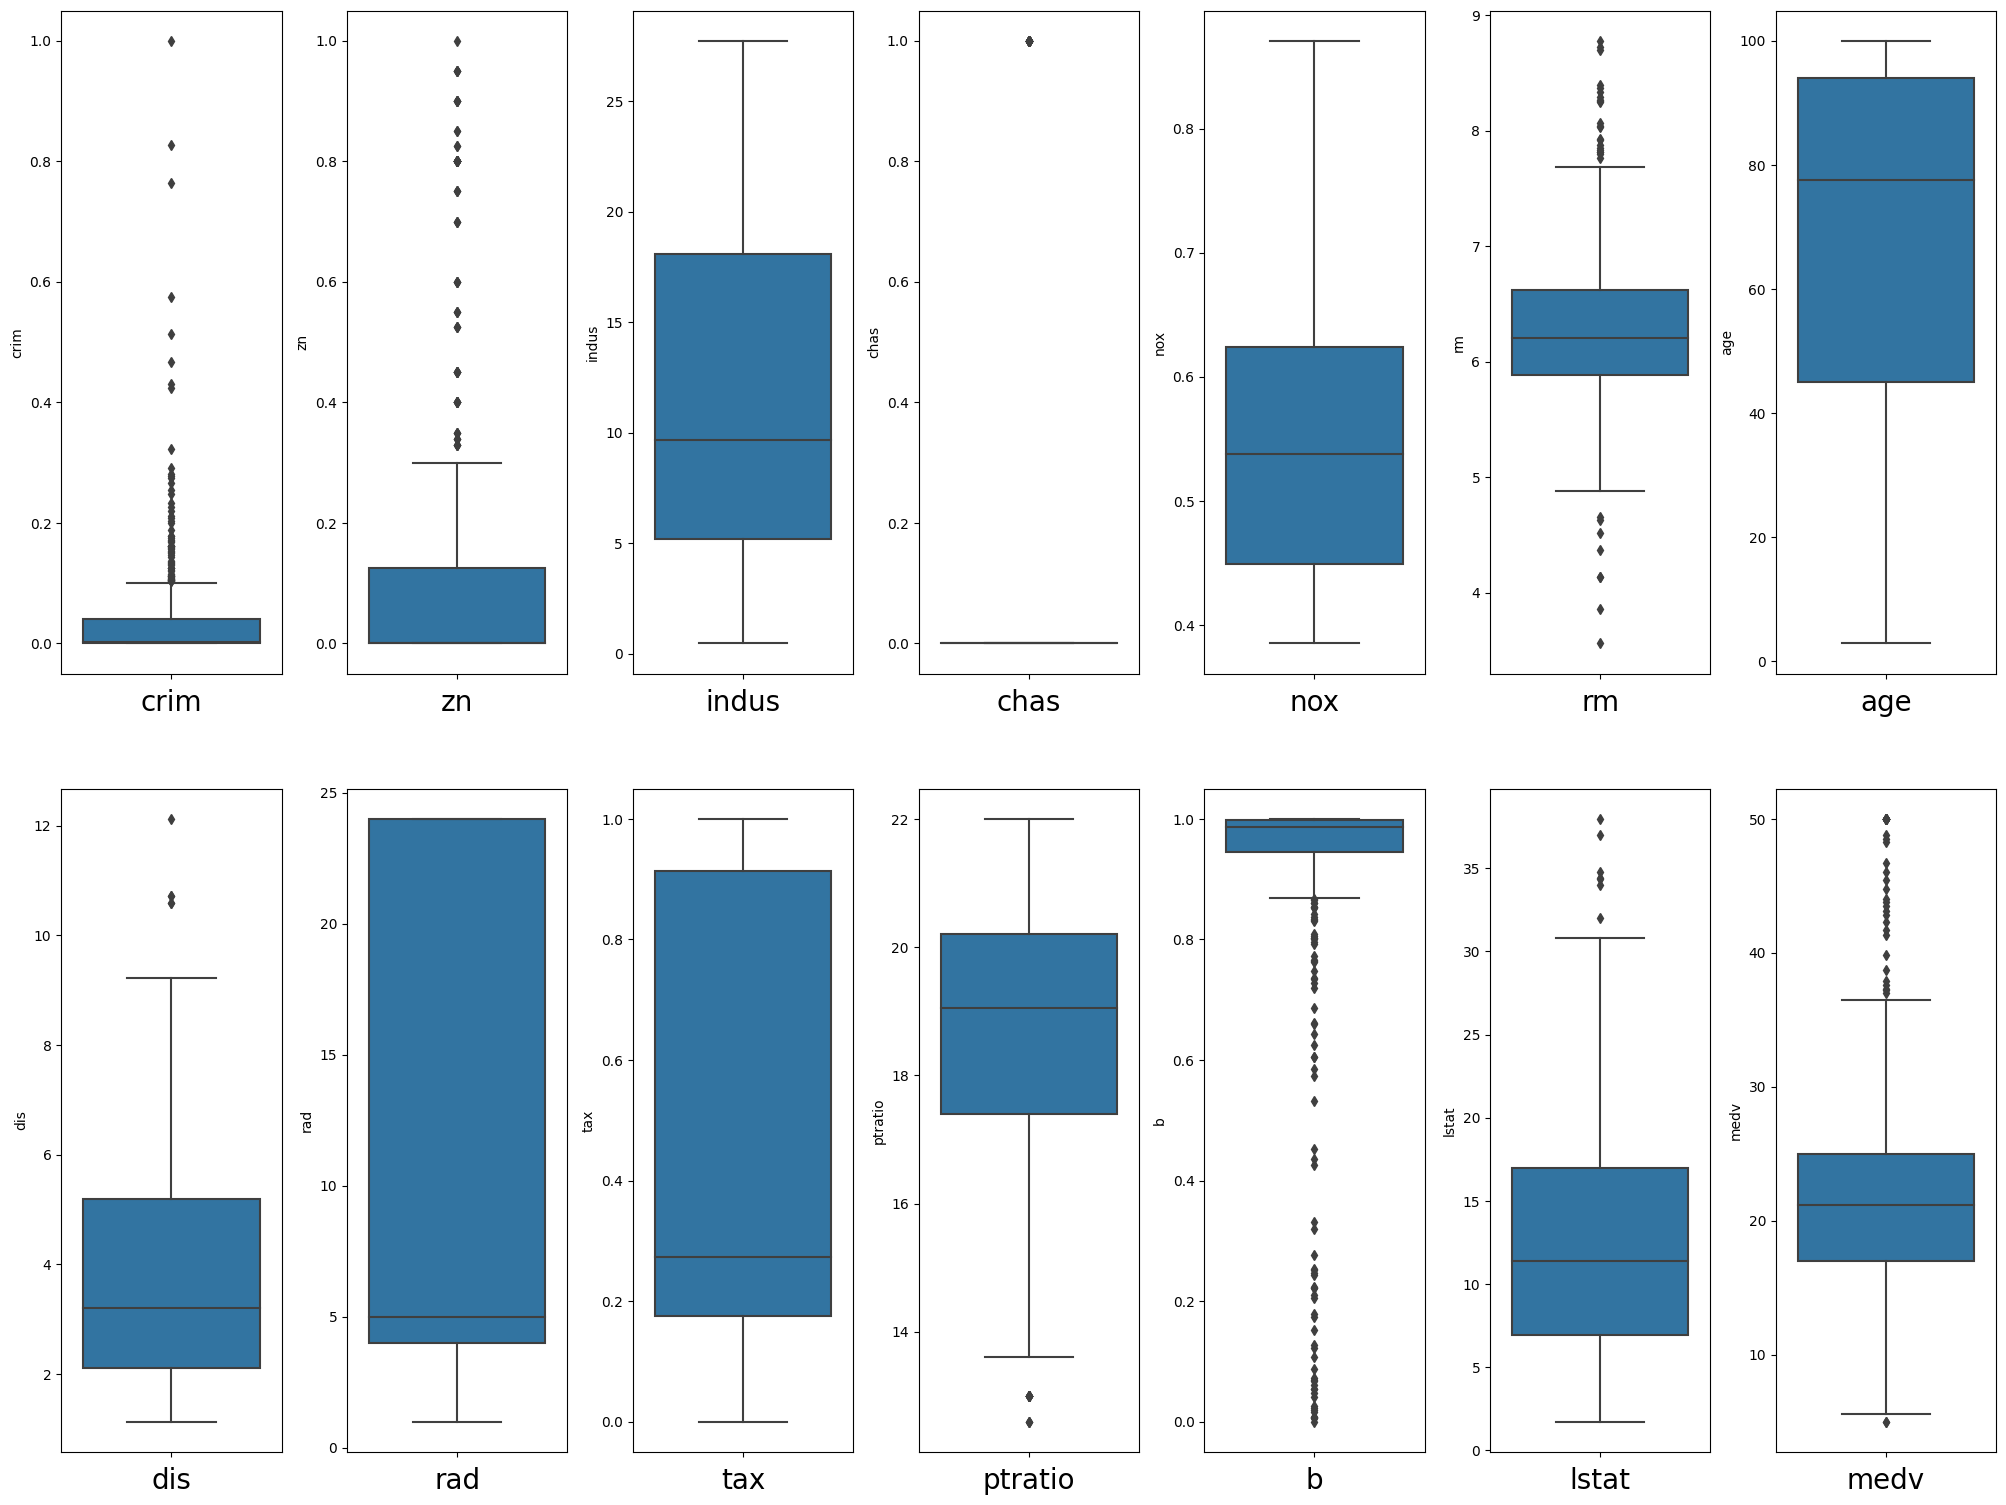

In [178]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    ax[index].set_xlabel(col, fontsize=20)  # Increase x-axis label font size
    ax[index].tick_params(axis='both', which='major', labelsize=10)  # Increase tick label font size
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

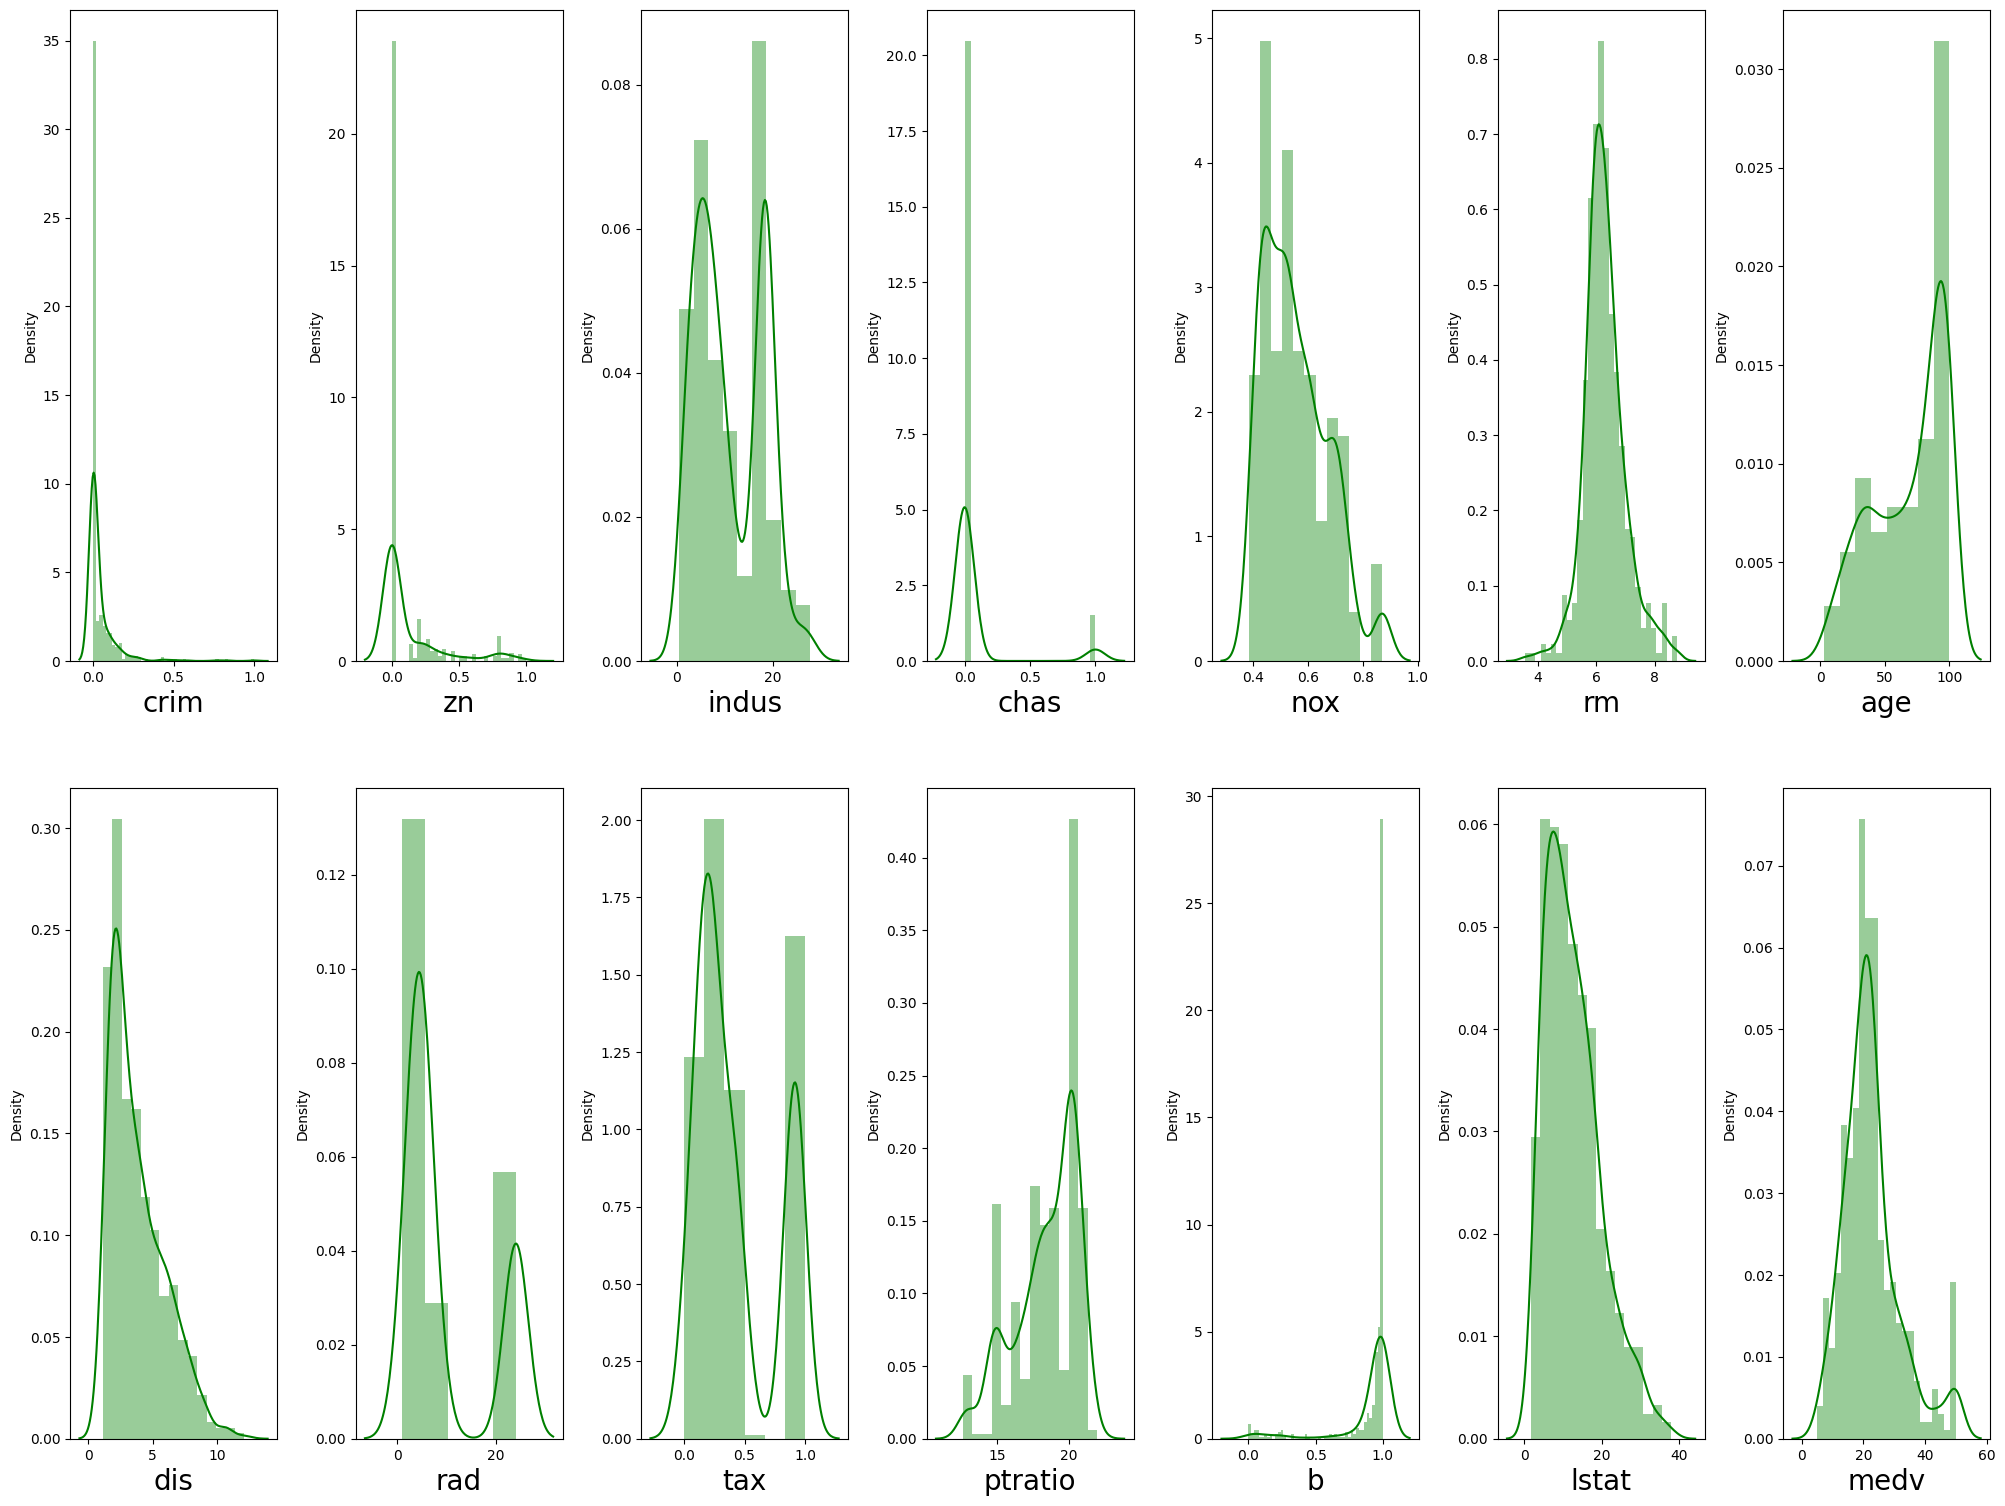

In [179]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index], color='g')
    ax[index].set_xlabel(col, fontsize=20)  # Increase x-axis label font size
    ax[index].tick_params(axis='both', which='major', labelsize=10)  # Increase tick label font size
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Normalization

In [82]:
# Lets perform Min-Max Normalization for columns:

In [180]:
cols = ['crim', 'zn', 'tax', 'b']

In [181]:
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    
    df[col] = (df[col]-minimum) / (maximum-minimum)

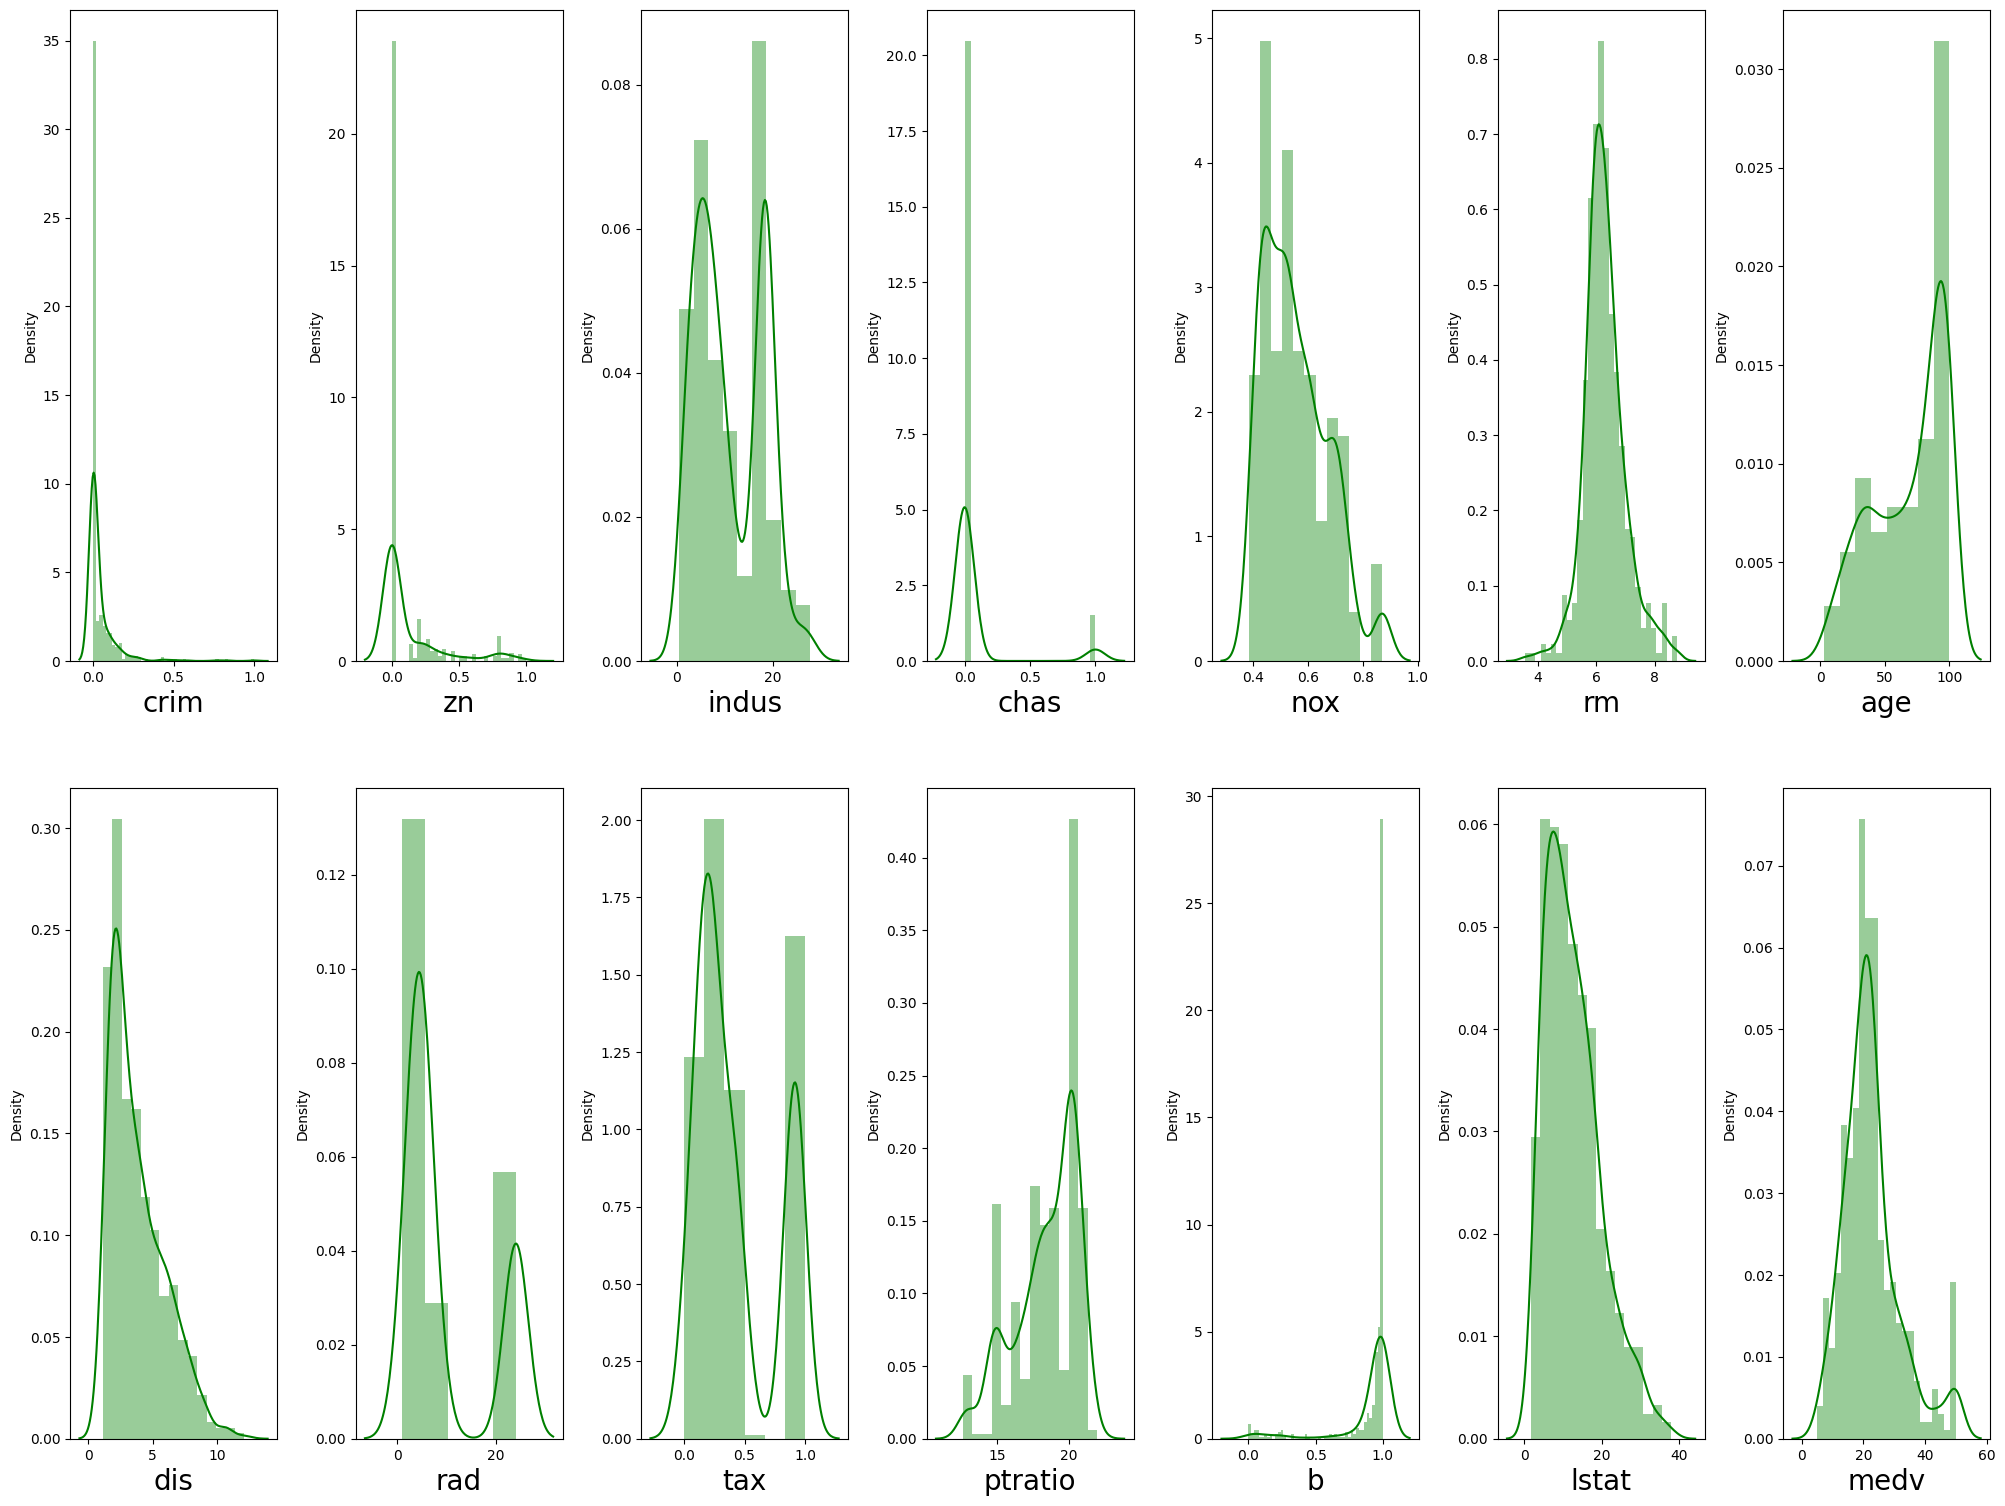

In [182]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index], color='g')
    ax[index].set_xlabel(col, fontsize=20)  # Increase x-axis label font size
    ax[index].tick_params(axis='both', which='major', labelsize=10)  # Increase tick label font size
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We can see the columns 'crim', 'zn', 'tax', 'b' are normalized between 0 and 1

# Independant and Dependant Features

In [117]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]

In [118]:
y = df['medv']

In [119]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,0.208015,15.300000,1.000000,4.98
1,0.000236,0.00,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,0.104962,17.799999,1.000000,9.14
2,0.000236,0.00,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,0.104962,17.799999,0.989737,4.03
3,0.000293,0.00,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,0.066794,18.700001,0.994276,2.94
4,0.000705,0.00,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,0.066794,18.700001,1.000000,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,0.164122,21.000000,0.987619,9.67
502,0.000438,0.00,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,0.164122,21.000000,1.000000,9.08
503,0.000612,0.00,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,0.164122,21.000000,1.000000,5.64
504,0.001161,0.00,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,0.164122,21.000000,0.991301,6.48


In [120]:
y

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: medv, Length: 506, dtype: float32

# Train Test Split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [124]:
X_test.shape, y_test.shape

((152, 13), (152,))

# Standardization

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [190]:
X_test = scaler.transform(X_test)

# 1. Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

In [146]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

# 1.1 Cross_Validation

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=30)

In [150]:
np.mean(mse)

-25.30774324723514

# 1.2 Prediction

In [154]:
reg_pred = regression.predict(X_test)

In [155]:
reg_pred

array([28.64895907, 36.49501319, 15.4111925 , 25.40321356, 18.8552792 ,
       23.14668866, 17.3921243 , 14.07859734, 23.03692817, 20.59943291,
       24.82286256, 18.53057142, -6.8654357 , 21.80172251, 19.22571289,
       26.19191988, 20.2773402 ,  5.61596453, 40.44888003, 17.57695936,
       27.4431901 , 30.17159595, 10.94055778, 24.02083067, 18.07693834,
       15.93474933, 23.12614015, 14.56052235, 22.3348254 , 19.32576277,
       22.1656497 , 25.19476121, 25.31372543, 18.513451  , 16.62232865,
       17.5026852 , 30.94992997, 20.19201678, 23.90440473, 24.86975419,
       13.93767816, 31.82504715, 42.56978938, 17.62323801, 27.0196322 ,
       17.19006539, 13.8059409 , 26.10356512, 20.31516061, 30.0864944 ,
       21.31240511, 34.15739613, 15.60445096, 26.11247691, 39.31613526,
       22.99282061, 18.95764674, 33.055556  , 24.85114225, 12.91729481,
       22.68101478, 30.80336366, 31.63522089, 16.29833691, 21.07380053,
       16.57699604, 20.36362025, 26.15615944, 31.06832983, 11.98

<Axes: xlabel='medv', ylabel='Density'>

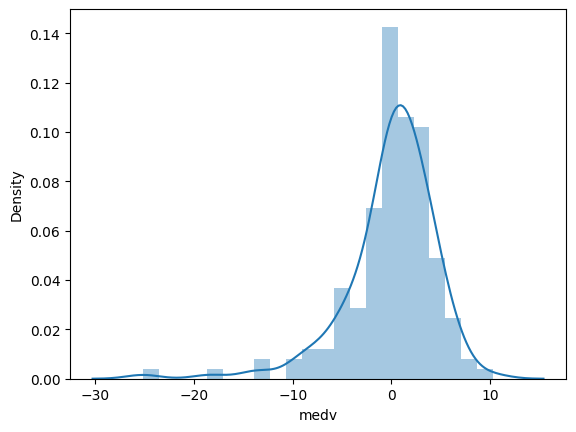

In [158]:
sns.distplot(reg_pred-y_test)

# 1.3 Performance Evaluation

In [194]:
from sklearn.metrics import r2_score

In [195]:
score = r2_score(reg_pred,y_test)

In [196]:
score

0.6693702943207105

In [199]:
# calculate adjusted_r_square 

# 2. Ridge Regression  

In [203]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [205]:
ridge = Ridge()

In [206]:
ridge

Ridge()

In [208]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,95]}
ridgecv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv = 5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   95]},
             scoring='neg_mean_squared_error')

In [210]:
ridgecv.best_params_

{'alpha': 10}

In [211]:
ridgecv.best_score_

-25.80722937269193

# 2.1 Prediction

In [217]:
ridge_pred = ridgecv.predict(X_test)

In [214]:
ridge_pred

array([28.41349439, 36.07453513, 16.1716396 , 25.30868117, 18.80946136,
       23.13610196, 17.61393961, 14.38360335, 22.53627342, 20.76952205,
       24.66003797, 18.8960489 , -6.22947622, 21.96166867, 19.30921219,
       25.85720064, 19.58613036,  5.69547333, 39.88738372, 17.56727849,
       27.14663768, 29.65696052, 11.44350052, 24.11125544, 17.95711955,
       15.57429077, 23.12734956, 14.75101392, 22.43522689, 19.54923806,
       21.981087  , 25.21097893, 25.13554774, 18.36676598, 16.33620515,
       17.94437737, 30.957099  , 20.30634933, 24.04235608, 24.83020454,
       14.25723568, 31.13073412, 41.66384208, 17.9841961 , 27.01273171,
       17.01890755, 14.15348624, 26.05436653, 19.9981473 , 30.25499835,
       21.54267223, 33.72177453, 16.00637963, 26.24691245, 38.87355816,
       22.75281189, 18.90407581, 32.36945834, 24.89966228, 13.35872311,
       22.91082384, 30.60280286, 31.24730153, 16.55651205, 22.02834778,
       16.75198789, 20.2041717 , 26.06542763, 30.62889758, 12.09

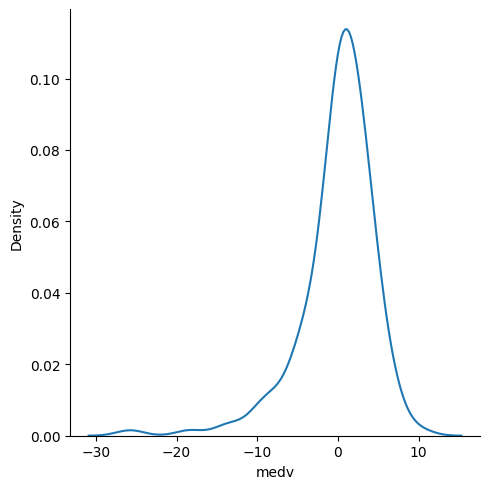

In [215]:
sns.displot(ridge_pred-y_test, kind='kde')

# 2.2 Performance Evaluation

In [219]:
score = r2_score(ridge_pred, y_test)

In [220]:
score

0.646855729909023

In [239]:
# calculate adjusted r2

# 3. Lasso Regression

In [225]:
from sklearn.linear_model import Lasso

In [226]:
lasso = Lasso()

In [227]:
lasso

Lasso()

In [228]:
parameters = {'alpha':[1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 60,
                                   70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [229]:
lassocv.best_params_

{'alpha': 1}

In [230]:
lassocv.best_score_

-31.153604243839204

# 3.1 Prediction

In [231]:
lasso_pred = lassocv.predict(X_test)

In [232]:
lasso_pred

array([26.12211949, 30.64819561, 17.74859363, 25.19460957, 19.29466845,
       22.82278988, 18.29163679, 14.64075508, 21.39330694, 20.41184757,
       20.63763258, 21.04309481,  1.20212282, 22.48770067, 20.32863178,
       24.82509708, 18.13265262,  6.81250842, 36.09245873, 18.45054868,
       25.64506063, 26.80170342, 13.73713981, 24.01576343, 18.81760073,
       15.42649411, 22.86865422, 19.00799556, 19.78638278, 19.64740876,
       19.93060179, 25.47637201, 25.21889342, 19.46825818, 15.8704367 ,
       20.50660462, 31.02198978, 21.65190215, 21.52470983, 24.76908901,
       14.39002279, 27.57471179, 36.56725848, 19.58680453, 25.57301665,
       17.187251  , 15.93362087, 25.87675294, 19.35466749, 29.59664998,
       23.11788379, 31.50427126, 17.53234149, 25.85419758, 35.21484532,
       22.89869831, 19.39011   , 29.39749372, 24.66544214, 16.65559709,
       25.47892542, 30.80725827, 28.94063094, 18.30751846, 27.60126348,
       14.37892801, 20.05681266, 25.59069044, 28.35700014, 16.00

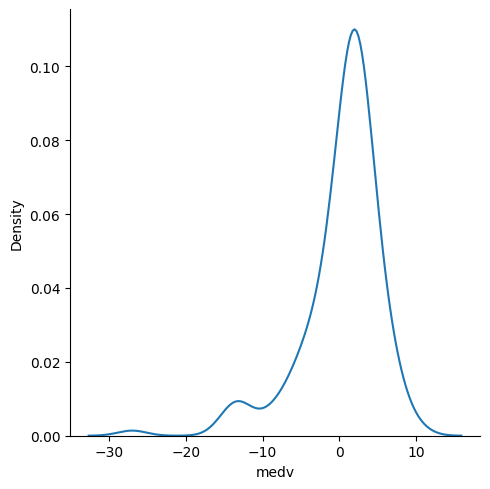

In [236]:
sns.displot(lasso_pred - y_test, kind='kde')

# 3.2 Performance Evaluation

In [237]:
score = r2_score(lasso_pred, y_test)

In [238]:
score

0.3257746374050632

In [240]:
# calculate adjusted r2

# 4. ElasticNet

# 5. SVR

# 6. Decision Tree

# 7. Random Forest R